# **Predictive Modeling of Biomechanical Joint Angles via Ensemble Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Loading the Dataset
df=pd.read_csv("C:\\Users\\hp\\Downloads\\gait.csv")
df.head()

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181800 entries, 0 to 181799
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   subject      181800 non-null  int64  
 1   condition    181800 non-null  int64  
 2   replication  181800 non-null  int64  
 3   leg          181800 non-null  int64  
 4   joint        181800 non-null  int64  
 5   time         181800 non-null  int64  
 6   angle        181800 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 9.7 MB


In [ ]:
#Statistics of Data
df.describe()

,subject,condition,replication,leg,joint,time,angle
count,181800.000000,181800.000000,181800.000000,181800.000000,181800.000000,181800.00000,181800.000000
mean,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,12.149321
std,2.872289,0.816499,2.872289,0.500001,0.816499,29.15484,16.025823
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,-27.004634
25%,3.000000,1.000000,3.000000,1.000000,1.000000,25.00000,1.794457
50%,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,9.466976
75%,8.000000,3.000000,8.000000,2.000000,3.000000,75.00000,18.559890
max,10.000000,3.000000,10.000000,2.000000,3.000000,100.00000,78.309342


**DATA CLEANING**

In [8]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print(duplicates.head())

Number of duplicate rows: 0
Empty DataFrame
Columns: [subject, condition, replication, leg, joint, time, angle]
Index: []


In [ ]:
#Checking if any imabalanced data is there
for col in df.columns:
  print(df[col].value_counts())

subject
1     18180
2     18180
3     18180
4     18180
5     18180
6     18180
7     18180
8     18180
9     18180
10    18180
Name: count, dtype: int64
condition
1    60600
2    60600
3    60600
Name: count, dtype: int64
replication
1     18180
2     18180
3     18180
4     18180
5     18180
6     18180
7     18180
8     18180
9     18180
10    18180
Name: count, dtype: int64
leg
1    90900
2    90900
Name: count, dtype: int64
joint
1    60600
2    60600
3    60600
Name: count, dtype: int64
time
0      1800
1      1800
2      1800
3      1800
4      1800
       ... 
96     1800
97     1800
98     1800
99     1800
100    1800
Name: count, Length: 101, dtype: int64
angle
28.136438    1
4.682881     1
5.073127     1
5.229774     1
5.083273     1
            ..
4.327660     1
3.571626     1
2.970254     1
2.621626     1
2.585939     1
Name: count, Length: 181800, dtype: int64


In [10]:
# Check for outliers using IQR for each numeric column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nColumn: {col}")
    print(f"Outliers count: {outliers.shape[0]}")



Column: subject
Outliers count: 0

Column: condition
Outliers count: 0

Column: replication
Outliers count: 0

Column: leg
Outliers count: 0

Column: joint
Outliers count: 0

Column: time
Outliers count: 0

Column: angle
Outliers count: 10762


In [14]:
df['angle'].skew()

1.3795136044668985

**EXPLORATORY DATA ANALYTICS**

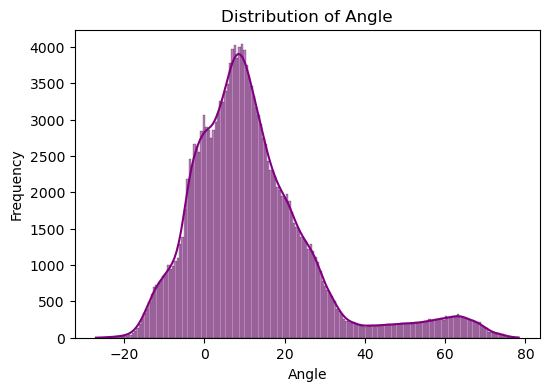

In [16]:
#Distribution of Angle
plt.figure(figsize=(6, 4))
sns.histplot(df['angle'], kde=True, color='purple')
plt.title("Distribution of Angle")
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4496\1906493471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='joint', y='angle', palette='Set2')


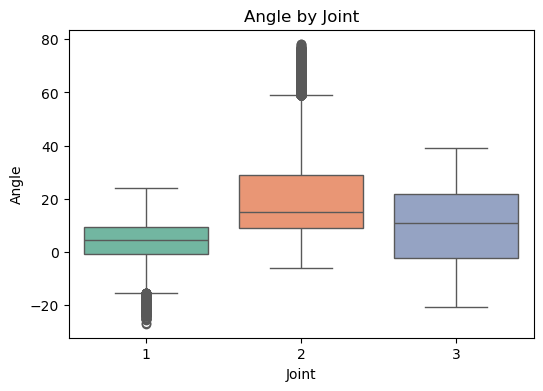

In [18]:
#Angle by Joint
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='joint', y='angle', palette='Set2')
plt.title("Angle by Joint")
plt.xlabel("Joint")
plt.ylabel("Angle")
plt.show()

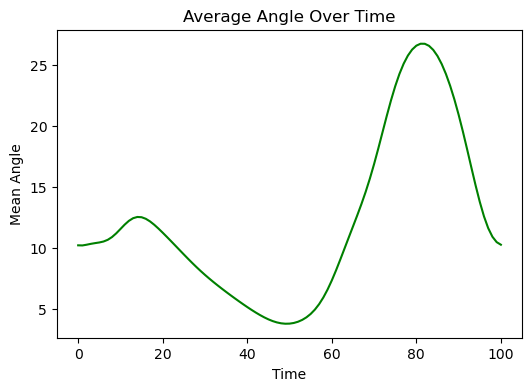

In [22]:
#Average Angle Over Time
plt.figure(figsize=(6, 4))
angle_by_time = df.groupby('time')['angle'].mean().reset_index()
sns.lineplot(data=angle_by_time, x='time', y='angle', color='green')
plt.title("Average Angle Over Time")
plt.xlabel("Time")
plt.ylabel("Mean Angle")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4496\2988206966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='condition', y='angle', palette='Set1',estimator='median')


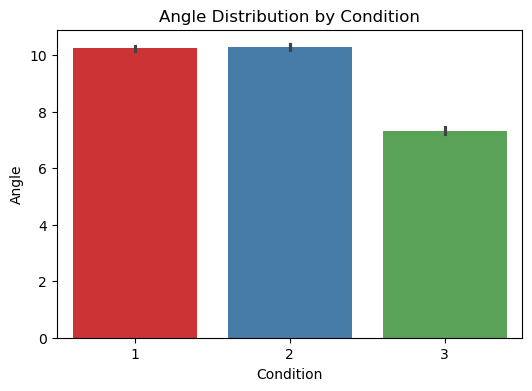

In [67]:
#Angle Distribution by Condition
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='condition', y='angle', palette='Set1',estimator='median')
plt.title("Angle Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Angle")
plt.show()

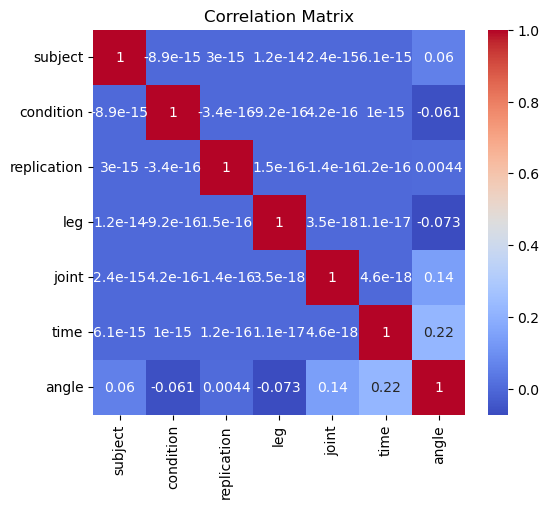

In [27]:
#Co relation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**DATA PREPROCESSING**

In [35]:
# Converting categorical columns
df['condition'] = df['condition'].astype('category')
df['leg'] = df['leg'].astype('category')
df['joint'] = df['joint'].astype('category')

# One-Hot Encoding
categorical_cols = ['condition', 'leg', 'joint']
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

X_numerical = df[['subject','replication','time']]
X = pd.concat([X_categorical, X_numerical], axis=1)

In [37]:
# Scaling target (angle)
y = df['angle'].values.reshape(-1, 1)
target_scaler = RobustScaler()
y_scaled = target_scaler.fit_transform(y).ravel()

# Spliting data into train and test data
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)

**TRAINING MODEL**

In [59]:
# Training XGBoost Regressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_scaled)

#Predict and inverse transform
y_pred_scaled = xgb_model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
# Train predictions and inverse transform
y_train_pred_scaled = xgb_model.predict(X_train)
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_train_original = target_scaler.inverse_transform(y_train_scaled.reshape(-1, 1))

# Test predictions and inverse transform (you already did this, but define test prediction properly too)
y_test_pred_scaled = xgb_model.predict(X_test)
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))


**MODEL EVALUATION**

In [61]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
train_r2 = r2_score(y_train_original, y_train_pred)

# Testing metrics
test_rmse = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
test_r2 = r2_score(y_test_original, y_test_pred)

print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Testing RMSE: {test_rmse:.3f}")
print(f"Testing R² Score: {test_r2:.3f}")

RMSE: 2.693
R² Score: 0.972
Training RMSE: 2.643
Training R² Score: 0.973
Testing RMSE: 2.693
Testing R² Score: 0.972


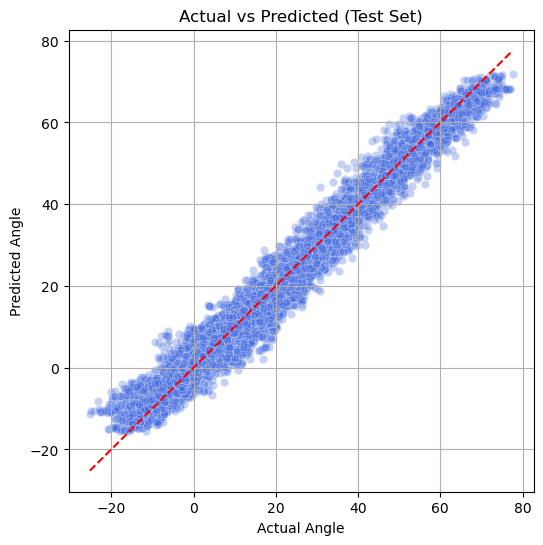

In [63]:
#Actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_original.flatten(), y=y_test_pred.flatten(), alpha=0.3, color='royalblue')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.show()


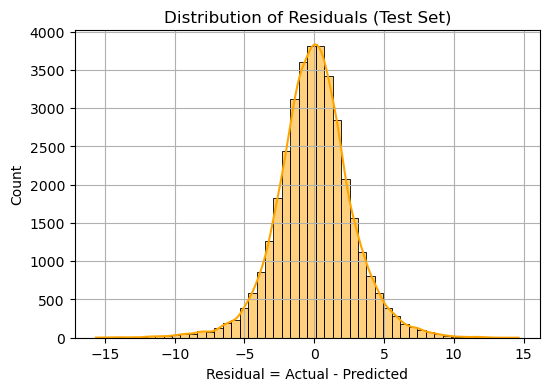

In [65]:
#distribution of residual plot
residuals = y_test_original.flatten() - y_test_pred.flatten()
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Residual = Actual - Predicted")
plt.grid(True)
plt.show()
